### 数据预处理

In [2]:
import csv
import pandas as pd
import numpy as np
import json

In [3]:
data = pd.read_csv('data_new.csv')

In [4]:
target = [["强","中","弱","没有回应（忽视）"], 
        ['中性','积极','消极'], 
        ["专注（任务中）","走神（任务外）"], 
        ["玩乐", "闲聊", "一人独立尝试一人摸鱼", "各自神游", "主导", "支持", "旁观", "冲突"]]

In [91]:
data.head()

,high0,high1,high2,high3,high4,high5,high6,high7,high8,high9,...,low310,low311,low312,low313,low314,low315,y1,y2,y3,y4
0,0.359752,0.424275,-0.681706,0.433839,0.004776,0.001909,0.004776,0.001909,97.547158,48.476906,...,2.834029,1.354602,7.016298,13.097574,37.208326,12.016522,2,1,0,6
1,0.374953,0.477638,-0.666732,0.429372,0.010201,0.002640,0.010201,0.002640,94.752225,45.264284,...,2.437439,1.380893,8.850943,1.986816,14.843469,2.682850,2,1,0,6
2,0.374791,0.433773,-0.650851,0.302914,0.027013,0.007587,0.027013,0.007587,103.646422,66.342239,...,264.340206,138.834556,277.803936,40.606839,39.674292,7.152803,0,1,0,4
3,0.425997,0.407457,-0.651442,0.335262,0.018433,0.004401,0.018433,0.004401,107.650662,116.364404,...,1.480924,5.826735,0.277468,0.268455,3.716497,1.082155,2,1,0,4
4,0.283344,0.433831,-0.662919,0.331787,0.020136,0.011439,0.020136,0.011439,97.096686,181.962040,...,2745.552274,351.139817,2397.996836,735.777116,293.425847,120.226725,0,1,0,5


In [6]:
X = data.drop(['y1','y2','y3','y4'],axis=1)
y1 = data['y1']
y2 = data['y2']
y3 = data['y3']
y4 = data['y4']
y = data[['y1','y2','y3','y4']]

将 y1 '中'类合并

In [9]:
y1_replace_target = ["强","弱","没有回应（忽视）"]

# 中合并成强
y1_replace0 = y1.replace(1,0)
# 整体label 前移一位
y1_replace0 = y1_replace0.replace(2,1) # 修正缺失的 1
y1_replace0 = y1_replace0.replace(3,2) # 修正缺失的 2


# 中合并为弱
y1_replace1 = y1.replace(2,1)
# 整体label 前移一位
y1_replace1 = y1_replace1.replace(3,2) # 修正缺失的 2

将 y4 根据y2类别分开为两份

In [76]:
# "玩乐", "闲聊", "一人独立尝试一人摸鱼", "各自神游"
y4_1 = y4[y3==1]
y4_1_target = target[3][:4]
print(f"y4_1:{y4_1.min()} - {y4_1.max()}")
print(y4_1_target)
X_1 = X[y3==1]


# "主导", "支持", "旁观", "冲突"
y4_2 = y4[y3==0] 
y4_2_target = target[3][4:]
print(f"y4_2:{y4_2.min()} - {y4_2.max()}")
print(y4_2_target)
X_2 = X[y3==0]

y4_1:0 - 3
['玩乐', '闲聊', '一人独立尝试一人摸鱼', '各自神游']
y4_2:0 - 7
['主导', '支持', '旁观', '冲突']


存在错误标记

In [77]:
print(y4_2[y4_2 == 0].index)
print(y4_2[y4_2 == 1].index)
print(y4_2[y4_2 == 2].index)
print(y4_2[y4_2 == 3].index)

Index([121], dtype='int64')
Index([], dtype='int64')
Index([138, 139, 1949], dtype='int64')
Index([], dtype='int64')


In [78]:
wrong_idx = y4_2[y4_2 == 0].index
wrong_idx = wrong_idx.append(y4_2[y4_2 == 2].index)

In [79]:
# 删除
y4_2 = y4_2.drop(wrong_idx)
X_2 = X_2.drop(wrong_idx)
print(f"y4_2:{y4_2.min()} - {y4_2.max()}")

y4_2:4 - 7


In [80]:
# 调整 label 符号
y4_2 = y4_2 - 4
print(f"y4_2:{y4_2.min()} - {y4_2.max()}")

y4_2:0 - 3


检查 nan

In [81]:
idx = np.where(np.isnan(X).any(axis=1)==True)[0]
idx

array([], dtype=int64)

In [86]:
if len(idx) != 0:
    print(f"drop {len(idx)} rows with nan value")
    for i in idx:
        X = np.delete(X, i, axis=0)
        y1 = np.delete(y1, i, axis=0)
        y2 = np.delete(y2, i, axis=0)
        y3 = np.delete(y3, i, axis=0)
        y4 = np.delete(y4, i, axis=0)
        y = np.delete(y, i, axis=0)
else:
    X = np.array(X)
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y = np.array(y)

In [87]:
X_norm = np.apply_along_axis(lambda x: x / np.linalg.norm(x), axis=0, arr=X)


In [88]:
# check nan in X_norm
np.where(np.isnan(X_norm).any(axis=1)==True)

(array([], dtype=int64),)

In [89]:
print(f"Read in videos y:{len(y1)}")

Read in videos y:3516


维度

In [90]:
print(f"X:{len(X[0])}")

X:373


## Train 

In [92]:
from sklearn.model_selection import train_test_split
# frame split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
print(f"Video num: X_train:{len(X_train)}, X_test:{len(X_test)}, y_train:{len(y_train)}, y_test:{len(y_test)}")

y1_train, y1_test = y_train[:,0], y_test[:,0]
y2_train, y2_test = y_train[:,1], y_test[:,1]
y3_train, y3_test = y_train[:,2], y_test[:,2]
y4_train, y4_test = y_train[:,3], y_test[:,3]

Video num: X_train:2812, X_test:704, y_train:2812, y_test:704


查看数据分布

强:850, 中:502, 弱:1466, 没有回应（忽视）:698, 


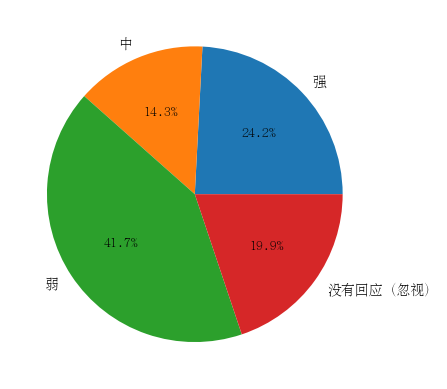

中性:1987, 积极:1050, 消极:479, 


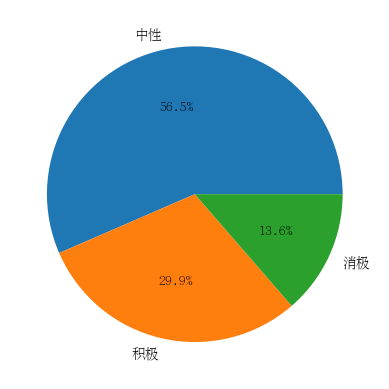

专注（任务中）:3102, 走神（任务外）:414, 


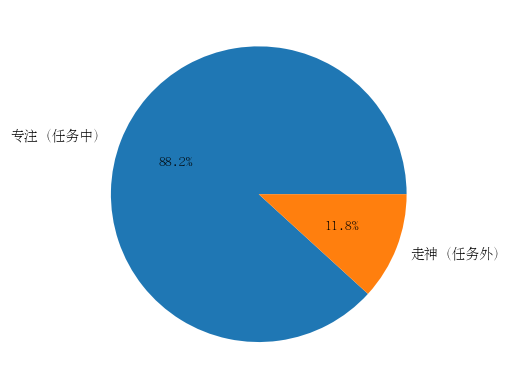

玩乐:13, 闲聊:36, 一人独立尝试一人摸鱼:350, 各自神游:19, 主导:993, 支持:1000, 旁观:1084, 冲突:21, 


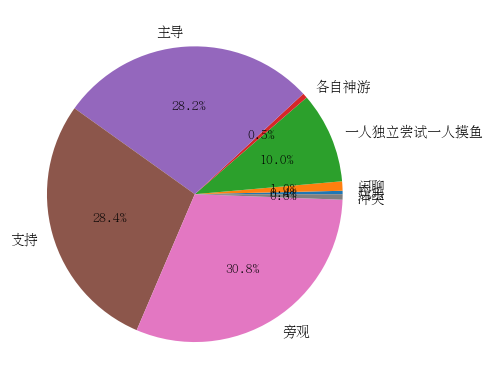

In [93]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # 步骤一

plt.rcParams["font.sans-serif"]=["AR PL UMing CN"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

def num_of_cls(y, target): 
    N = []
    for i in range(len(target)):
        print(target[i] + f":{len(y[y==i])}", end=", ")
        N.append(len(y[y==i]))
    print()
    return N

for i in range(4):
    N = num_of_cls(y[:,i],target[i])
    # proportions = [ p/len(y) for p in N]
    plt.pie(N,labels=target[i],autopct='%1.1f%%')
    plt.show()


inversely proportional class weights

In [94]:
from sklearn.utils import class_weight
import numpy as np

# Calculate class weights
class_weights = [class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(i), y=i) for i in [y1,y2,y3,y4]]


# Convert class weights to a dictionary for compatibility with some classifiers
class_weight_dict = [dict(enumerate(class_weights[i])) for i in range(4)]


over_sampling

In [95]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# RandomOverSampler
X1_resampled, y1_resampled = RandomOverSampler(random_state=42).fit_resample(X_train, y1_train)
X2_resampled, y2_resampled = RandomOverSampler(random_state=42).fit_resample(X_train, y2_train)
X3_resampled, y3_resampled = RandomOverSampler(random_state=42).fit_resample(X_train, y3_train)
X4_resampled, y4_resampled = RandomOverSampler(random_state=42).fit_resample(X_train, y4_train)

# # SMOTE
# X1_resampled, y1_resampled = SMOTE().fit_resample(X_norm, y1)
# X2_resampled, y2_resampled = SMOTE().fit_resample(X_norm, y2)
# X3_resampled, y3_resampled = SMOTE().fit_resample(X_norm, y3)
# X4_resampled, y4_resampled = SMOTE().fit_resample(X_norm, y4)


Cross-validation  
- 5 folds

In [96]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV

def crossVal(rfc, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scoring = ['accuracy', 'f1_weighted', 'recall_weighted', 'precision_weighted']

    # 使用交叉验证器对模型进行评估
    scores = cross_validate(rfc, X, y, cv=kfold, scoring=scoring)

    # 输出交叉验证结果
    print('Accuracy:', scores['test_accuracy'].mean())
    print('F1 score:', scores['test_f1_weighted'].mean())
    print('Recall:', scores['test_recall_weighted'].mean())
    print('Precision:', scores['test_precision_weighted'].mean())

def GridSearch(estimator, param_grid, X_train, y_train, X_test, y_test, target, cv=5):
    # grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv)
    # grid_search = RandomizedSearchCV(estimator=estimator, param_grid=param_grid, cv=cv)
    # grid_search = HalvingGridSearchCV(estimator=estimator, param_distributions=param_grid, cv=cv)
    grid_search = HalvingRandomSearchCV(estimator=estimator,param_distributions=param_grid, cv=cv)


    grid_search.fit(X_train, y_train)

    # print(grid_search.best_params_, grid_search.best_score_)
    print("Best hyperparameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)
    
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test, y_test)
    y_predict = best_model.predict(X_test)
    print("Test score:", test_score)
    print("Report:")
    report = classification_report(y_test, y_predict, target_names=target, zero_division=0)
    # print(classification_report(y_test, y_predict, target_names=target, zero_division=0))
    return best_model, report, grid_search.best_params_

In [97]:
import csv
def parse_report( method, params, report, csv_dir):
    """
    method: [task, classifer, hyperparameters]
    """
    # Parse the classification report
    print(report)
    type(report)
    lines = report.split('\n')
    data = lines[-3:]
    values = [line.split() for line in data]

    # Extract the desired values
    precision = float(values[0][2])
    recall = float(values[0][3])
    f1_score = float(values[0][4])

    # Extract the desired values
    Wprecision = float(values[1][2])
    Wrecall = float(values[1][3])
    Wf1_score = float(values[1][4])

    # Print the extracted values
    print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1_score}, WPrecision: {Wprecision}, WRecall: {Wrecall}, WF1-score: {Wf1_score}")
    with open(csv_dir,'a',newline='') as file:
        writer = csv.writer(file)
        writer.writerow(method)
        writer.writerow(params.keys())
        writer.writerow(params.values())
        writer.writerow([precision,recall,f1_score,Wprecision,Wrecall,Wf1_score])
        writer.writerow([])


### Random Forest

In [98]:

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# 使用随机森林预测一个frame
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)

for i in range(len(target)):
    print(f"----------------------Task {i}----------------------")
    print(classification_report(y_test[:,i], y_predict[:,i], target_names=target[i],zero_division=0))
    num_of_cls(y_predict[:,i],target[i])


----------------------Task 0----------------------
              precision    recall  f1-score   support

           强       0.54      0.27      0.36       170
           中       0.00      0.00      0.00       107
           弱       0.43      0.92      0.59       281
    没有回应（忽视）       0.62      0.10      0.18       146

    accuracy                           0.45       704
   macro avg       0.40      0.32      0.28       704
weighted avg       0.43      0.45      0.36       704

强:85, 中:0, 弱:595, 没有回应（忽视）:24, 
----------------------Task 1----------------------
              precision    recall  f1-score   support

          中性       0.57      0.98      0.72       381
          积极       0.76      0.17      0.28       224
          消极       0.00      0.00      0.00        99

    accuracy                           0.58       704
   macro avg       0.44      0.38      0.33       704
weighted avg       0.55      0.58      0.48       704

中性:654, 积极:50, 消极:0, 
----------------------Task 2

In [ ]:
csv_dir = "result.csv"

#### task 1

In [99]:
# GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight':[class_weight_dict[0]] 
}

rfc = RandomForestClassifier()
RandomForest,report,param = GridSearch(estimator=rfc, 
                            param_grid=param_grid, 
                            X_train=X_train, y_train=y1_train, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)
                            
parse_report(method=["task1","RandomForest"], params = param, report=report, csv_dir=csv_dir)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'class_weight': {0: 1.0341176470588236, 1: 1.750996015936255, 2: 0.5995907230559345, 3: 1.2593123209169055}}
Best cross-validation score: 0.4466795865633075
Test score: 0.4630681818181818
Report:
              precision    recall  f1-score   support

           强       0.47      0.38      0.42       170
           中       0.00      0.00      0.00       107
           弱       0.45      0.83      0.58       281
    没有回应（忽视）       0.62      0.19      0.29       146

    accuracy                           0.46       704
   macro avg       0.39      0.35      0.32       704
weighted avg       0.42      0.46      0.40       704

Precision: 0.39, Recall: 0.35, F1-score: 0.32, WPrecision: 0.42, WRecall: 0.46, WF1-score: 0.4


#### Task 2

In [81]:
# GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight':[class_weight_dict[1]] 
}
rfc = RandomForestClassifier()
RandomForest,report,param = GridSearch(estimator=rfc, param_grid=param_grid, 
                            X_train=X_train, y_train=y2_train, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=5)

parse_report(method=["task2","RandomForest"], params = param, report=report, csv_dir=csv_dir)                            

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'class_weight': {0: 0.5891360412637009, 1: 1.132280049566295, 2: 2.3842139595564253}}
Best cross-validation score: 0.6150736073989224
Test score: 0.6196990424076607
Report:
              precision    recall  f1-score   support

          中性       0.62      0.88      0.73       401
          积极       0.64      0.43      0.51       218
          消极       0.54      0.06      0.11       112

    accuracy                           0.62       731
   macro avg       0.60      0.46      0.45       731
weighted avg       0.61      0.62      0.57       731

Precision: 0.6, Recall: 0.46, F1-score: 0.45, WPrecision: 0.61, WRecall: 0.62, WF1-score: 0.57


#### Task 3

In [82]:
# GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight':[class_weight_dict[2]] 
}
rfc = RandomForestClassifier()
RandomForest,report,param = GridSearch(estimator=rfc, param_grid=param_grid, 
                            X_train=X_train, y_train=y3_train, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=5)
                            
parse_report(method=["task3","RandomForest"], params = param, report=report, csv_dir=csv_dir)  

/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 144 is smaller than n_iter=146. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'class_weight': {0: 0.568252487562189, 1: 4.162870159453303}}
Best cross-validation score: 0.8764782326185836
Test score: 0.8768809849521204
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.88      1.00      0.93       638
     走神（任务外）       0.80      0.04      0.08        93

    accuracy                           0.88       731
   macro avg       0.84      0.52      0.51       731
weighted avg       0.87      0.88      0.83       731

Precision: 0.84, Recall: 0.52, F1-score: 0.51, WPrecision: 0.87, WRecall: 0.88, WF1-score: 0.83


#### Task 4

In [83]:
# GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight':[class_weight_dict[3]] 
}
rfc = RandomForestClassifier()
RandomForest,report,param = GridSearch(estimator=rfc, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=5)
parse_report(method=["task4","RandomForest"], params = param, report=report, csv_dir=csv_dir)  

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'class_weight': {0: 35.14423076923077, 1: 11.71474358974359, 2: 1.2314690026954178, 3: 22.84375, 4: 0.44704011741682975, 5: 0.43720095693779903, 6: 0.40756021409455845, 7: 19.036458333333332}}
Best cross-validation score: 0.44929427687548334
Test score: 0.4377564979480164
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         3
          闲聊       0.00      0.00      0.00         7
  一人独立尝试一人摸鱼       0.42      0.18      0.25        78
        各自神游       0.00      0.00      0.00         5
          主导       0.43      0.53      0.47       205
          支持       0.42      0.44      0.43       207
          旁观       0.47      0.48      0.48       219
          冲突       0.00      0.00      0.00         7

    accuracy                           0.44       731
   macro avg       0.22      0.20      0.20       731
weighted avg  

### DT

In [84]:
from sklearn.tree import DecisionTreeClassifier
# 建立决策树分类器
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
for i in range(len(target)):
    print(f"----------------------Task {i}----------------------")
    print(classification_report(y_test[:,i], y_predict[:,i], target_names=target[i],zero_division=0))
    num_of_cls(y_predict[:,i],target[i])

----------------------Task 0----------------------
              precision    recall  f1-score   support

           强       0.34      0.25      0.29       183
           中       0.11      0.14      0.12       103
           弱       0.46      0.46      0.46       309
    没有回应（忽视）       0.28      0.33      0.30       136

    accuracy                           0.34       731
   macro avg       0.30      0.29      0.29       731
weighted avg       0.35      0.34      0.34       731

强:137, 中:128, 弱:306, 没有回应（忽视）:160, 
----------------------Task 1----------------------
              precision    recall  f1-score   support

          中性       0.58      0.63      0.60       401
          积极       0.36      0.31      0.33       218
          消极       0.18      0.16      0.17       112

    accuracy                           0.47       731
   macro avg       0.37      0.37      0.37       731
weighted avg       0.45      0.47      0.46       731

中性:439, 积极:190, 消极:102, 
---------------------

#### task 1

In [85]:
# GridSearch
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight':[class_weight_dict[0]] 
}
clf = DecisionTreeClassifier()
DT,report,param = GridSearch(estimator=clf, 
                param_grid=param_grid, 
                X_train=X_train, y_train=y1_train, 
                X_test=X_test, y_test=y1_test,
                target=target[0], cv=5)
parse_report(method=["task1","DT"], params = param, report=report, csv_dir=csv_dir)  

Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 90, 'criterion': 'entropy', 'class_weight': {0: 1.0466781214203895, 1: 1.7437977099236641, 2: 0.6067397078353254, 3: 1.215093085106383}}
Best cross-validation score: 0.3076916451335056
Test score: 0.3967168262653899
Report:
              precision    recall  f1-score   support

           强       0.36      0.31      0.33       183
           中       0.19      0.21      0.20       103
           弱       0.53      0.51      0.52       309
    没有回应（忽视）       0.33      0.40      0.36       136

    accuracy                           0.40       731
   macro avg       0.35      0.36      0.35       731
weighted avg       0.40      0.40      0.40       731

Precision: 0.35, Recall: 0.36, F1-score: 0.35, WPrecision: 0.4, WRecall: 0.4, WF1-score: 0.4


#### task 2

In [86]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight':[class_weight_dict[1]] 
}
clf = DecisionTreeClassifier()
DT,report,param = GridSearch(estimator=clf, 
                param_grid=param_grid, 
                X_train=X_train, y_train=y2_train, 
                X_test=X_test, y_test=y2_test,
                target=target[1], cv=5)

parse_report(method=["task2","DT"], params = param, report=report, csv_dir=csv_dir)  

Best hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 150, 'criterion': 'entropy', 'class_weight': {0: 0.5891360412637009, 1: 1.132280049566295, 2: 2.3842139595564253}}
Best cross-validation score: 0.4985609435323067
Test score: 0.466484268125855
Report:
              precision    recall  f1-score   support

          中性       0.57      0.60      0.58       401
          积极       0.36      0.33      0.34       218
          消极       0.26      0.26      0.26       112

    accuracy                           0.47       731
   macro avg       0.40      0.40      0.40       731
weighted avg       0.46      0.47      0.46       731

Precision: 0.4, Recall: 0.4, F1-score: 0.4, WPrecision: 0.46, WRecall: 0.47, WF1-score: 0.46


#### task 3

In [87]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight':[class_weight_dict[2]] 
}
clf = DecisionTreeClassifier()
DT,report,param = GridSearch(estimator=clf, 
                param_grid=param_grid, 
                X_train=X_train, y_train=y3_train, 
                X_test=X_test, y_test=y3_test,
                target=target[2], cv=5)


parse_report(method=["task3","DT"], params = param, report=report, csv_dir=csv_dir)  

Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini', 'class_weight': {0: 0.568252487562189, 1: 4.162870159453303}}
Best cross-validation score: 0.8258017046974736
Test score: 0.841313269493844
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.92      0.90      0.91       638
     走神（任务外）       0.39      0.46      0.43        93

    accuracy                           0.84       731
   macro avg       0.66      0.68      0.67       731
weighted avg       0.85      0.84      0.85       731

Precision: 0.66, Recall: 0.68, F1-score: 0.67, WPrecision: 0.85, WRecall: 0.84, WF1-score: 0.85


#### task 4

In [88]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight':[class_weight_dict[3]] 
}
clf = DecisionTreeClassifier()
DT,report,param = GridSearch(estimator=clf, 
                param_grid=param_grid, 
                X_train=X_train, y_train=y4_train, 
                X_test=X_test, y_test=y4_test,
                target=target[3], cv=5)


parse_report(method=["task4","DT"], params = param, report=report, csv_dir=csv_dir)  

Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': {0: 35.14423076923077, 1: 11.71474358974359, 2: 1.2314690026954178, 3: 22.84375, 4: 0.44704011741682975, 5: 0.43720095693779903, 6: 0.40756021409455845, 7: 19.036458333333332}}
Best cross-validation score: 0.33812516112400104
Test score: 0.31600547195622436
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         3
          闲聊       0.00      0.00      0.00         7
  一人独立尝试一人摸鱼       0.14      0.13      0.14        78
        各自神游       0.00      0.00      0.00         5
          主导       0.32      0.32      0.32       205
          支持       0.34      0.34      0.34       207
          旁观       0.37      0.38      0.38       219
          冲突       0.20      0.14      0.17         7

    accuracy                           0.32       731
   macro avg       0.17      0.16      0.17       731
weighted av

### KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

# 建立KNN分类器
clf = KNeighborsClassifier(n_neighbors=3)

#### task 1

In [106]:
# GridSearch
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': list(range(1, 51))
}
clf = KNeighborsClassifier()
KNN,report,param = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y1_train, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)
parse_report(method=["task1","KNN"], params = param, report=report, csv_dir=csv_dir)  

Best hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 18, 'leaf_size': 19}
Best cross-validation score: 0.3874074074074074
Test score: 0.42818057455540354
Report:
              precision    recall  f1-score   support

           强       0.37      0.25      0.30       183
           中       0.58      0.07      0.12       103
           弱       0.44      0.77      0.56       309
    没有回应（忽视）       0.42      0.16      0.23       136

    accuracy                           0.43       731
   macro avg       0.45      0.31      0.30       731
weighted avg       0.44      0.43      0.37       731

Precision: 0.45, Recall: 0.31, F1-score: 0.3, WPrecision: 0.44, WRecall: 0.43, WF1-score: 0.37


#### task 2

In [107]:
# GridSearch
param_grid = {
    'n_neighbors': list(range(1, 29)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': list(range(1, 51))
}
clf = KNeighborsClassifier()
KNN,report,param = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y2_train, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=6)
parse_report(method=["task2","KNN"], params = param, report=report, csv_dir=csv_dir)                             

Best hyperparameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 28, 'leaf_size': 34}
Best cross-validation score: 0.5745266075544809
Test score: 0.5649794801641587
Report:
              precision    recall  f1-score   support

          中性       0.57      0.93      0.70       401
          积极       0.55      0.18      0.27       218
          消极       0.00      0.00      0.00       112

    accuracy                           0.56       731
   macro avg       0.37      0.37      0.32       731
weighted avg       0.47      0.56      0.47       731

Precision: 0.37, Recall: 0.37, F1-score: 0.32, WPrecision: 0.47, WRecall: 0.56, WF1-score: 0.47


#### task 3

In [108]:
param_grid = {
    'n_neighbors': list(range(1, 29)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': list(range(1, 51))
}
clf = KNeighborsClassifier()
KNN,report,param = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y3_train, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=10)

parse_report(method=["task3","KNN"], params = param, report=report, csv_dir=csv_dir)  

Best hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 26, 'leaf_size': 49}
Best cross-validation score: 0.8808324679820008
Test score: 0.8727770177838577
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.87      1.00      0.93       638
     走神（任务外）       0.00      0.00      0.00        93

    accuracy                           0.87       731
   macro avg       0.44      0.50      0.47       731
weighted avg       0.76      0.87      0.81       731

Precision: 0.44, Recall: 0.5, F1-score: 0.47, WPrecision: 0.76, WRecall: 0.87, WF1-score: 0.81


#### task 4

In [109]:
param_grid = {
    'n_neighbors': list(range(1, 29)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': list(range(1, 51))
}
clf = KNeighborsClassifier()
KNN,report,param = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=5)
parse_report(method=["task4","KNN"], params = param, report=report, csv_dir=csv_dir)  

Best hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 24, 'leaf_size': 39}
Best cross-validation score: 0.35942360574031107
Test score: 0.34746922024623805
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         3
          闲聊       0.00      0.00      0.00         7
  一人独立尝试一人摸鱼       0.00      0.00      0.00        78
        各自神游       0.00      0.00      0.00         5
          主导       0.37      0.37      0.37       205
          支持       0.35      0.18      0.24       207
          旁观       0.34      0.64      0.44       219
          冲突       0.00      0.00      0.00         7

    accuracy                           0.35       731
   macro avg       0.13      0.15      0.13       731
weighted avg       0.30      0.35      0.30       731

Precision: 0.13, Recall: 0.15, F1-score: 0.13, WPrecision: 0.3, WRecall: 0.35, WF1-score: 0.3


### SVM
结果很差 看warning原因应该是有一些结果直接没有分类  
看看是否需要调参数或者直接去掉 

In [110]:
from sklearn.svm import SVC
clf = SVC()

#### task 1

In [111]:
# GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'class_weight':[class_weight_dict[0]]
}
clf = SVC()
svm,report,param = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y1_train, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)

parse_report(method=["task1","SVM"], params = param, report=report, csv_dir=csv_dir)  

Best hyperparameters: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': {0: 1.0466781214203895, 1: 1.7437977099236641, 2: 0.6067397078353254, 3: 1.215093085106383}, 'C': 10}
Best cross-validation score: 0.4086821705426356
Test score: 0.4008207934336525
Report:
              precision    recall  f1-score   support

           强       0.38      0.36      0.37       183
           中       0.20      0.17      0.19       103
           弱       0.48      0.51      0.50       309
    没有回应（忽视）       0.36      0.38      0.37       136

    accuracy                           0.40       731
   macro avg       0.36      0.36      0.36       731
weighted avg       0.40      0.40      0.40       731

Precision: 0.36, Recall: 0.36, F1-score: 0.36, WPrecision: 0.4, WRecall: 0.4, WF1-score: 0.4


#### task 2

In [112]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'class_weight':[class_weight_dict[1]]
}
clf = SVC()
svm,report,param = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y2_train, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=5)

parse_report(method=["task2","SVM"], params = param, report=report, csv_dir=csv_dir) 

Best hyperparameters: {'kernel': 'rbf', 'gamma': 1000.0, 'class_weight': {0: 0.5891360412637009, 1: 1.132280049566295, 2: 2.3842139595564253}, 'C': 10}
Best cross-validation score: 0.5751304569173985
Test score: 0.5485636114911081
Report:
              precision    recall  f1-score   support

          中性       0.55      1.00      0.71       401
          积极       0.00      0.00      0.00       218
          消极       0.00      0.00      0.00       112

    accuracy                           0.55       731
   macro avg       0.18      0.33      0.24       731
weighted avg       0.30      0.55      0.39       731

Precision: 0.18, Recall: 0.33, F1-score: 0.24, WPrecision: 0.3, WRecall: 0.55, WF1-score: 0.39


#### task 3

In [113]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'class_weight':[class_weight_dict[2]]
}
clf = SVC()
svm,report,param = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y3_train, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=5)
parse_report(method=["task3","SVM"], params = param, report=report, csv_dir=csv_dir) 

/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
146 fits failed out of a total of 730.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
146 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/svm/_base.py", line 201, in fit
    y = self._validate_targets(y)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/svm/_base.py", line 749, in _validate_targe

Best hyperparameters: {'kernel': 'rbf', 'gamma': 100.0, 'class_weight': {0: 0.568252487562189, 1: 4.162870159453303}, 'C': 100}
Best cross-validation score: 0.8752302870465926
Test score: 0.8727770177838577
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.87      1.00      0.93       638
     走神（任务外）       0.00      0.00      0.00        93

    accuracy                           0.87       731
   macro avg       0.44      0.50      0.47       731
weighted avg       0.76      0.87      0.81       731

Precision: 0.44, Recall: 0.5, F1-score: 0.47, WPrecision: 0.76, WRecall: 0.87, WF1-score: 0.81


#### task 4

In [114]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'class_weight':[class_weight_dict[3]]
}
clf = SVC()
svm,report,param = GridSearch(estimator=clf, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=5)
parse_report(method=["task4","SVM"], params = param, report=report, csv_dir=csv_dir) 

Best hyperparameters: {'kernel': 'rbf', 'gamma': 10.0, 'class_weight': {0: 35.14423076923077, 1: 11.71474358974359, 2: 1.2314690026954178, 3: 22.84375, 4: 0.44704011741682975, 5: 0.43720095693779903, 6: 0.40756021409455845, 7: 19.036458333333332}, 'C': 10}
Best cross-validation score: 0.3765586061699751
Test score: 0.3844049247606019
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         3
          闲聊       0.00      0.00      0.00         7
  一人独立尝试一人摸鱼       0.55      0.08      0.13        78
        各自神游       0.00      0.00      0.00         5
          主导       0.41      0.38      0.40       205
          支持       0.35      0.53      0.42       207
          旁观       0.40      0.40      0.40       219
          冲突       0.00      0.00      0.00         7

    accuracy                           0.38       731
   macro avg       0.21      0.17      0.17       731
weighted avg       0.39      0.38      0.36       731

Preci

### XGBoost

In [ ]:
import xgboost as xgb


# 定义模型参数
params = {
    'objective': 'multi:softmax',
    'num_class': 4,
    'eval_metric': 'mlogloss'
}

# 将数据转换为DMatrix格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 训练模型
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# 在测试集上预测
y_pred = model.predict(dtest)

# 计算准确率
accuracy = sum(y_pred == y_test) / len(y_test)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred, target_names=["强","中","弱","没有回应（忽视）"]))


In [88]:
# 使用随机森林预测一个frame
xgb = XGBClassifier(n_estimators=1000, random_state=42)

xgb.fit(X_train, y4_train)

# 在测试集上预测
y_predict = xgb.predict(X_test)


print(classification_report(y4_test, y_predict, target_names=target[3],zero_division=0))
num_of_cls(y_predict,target[3])

              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         3
          闲聊       1.00      0.14      0.25         7
  一人独立尝试一人摸鱼       0.40      0.32      0.35        78
        各自神游       0.00      0.00      0.00         5
          主导       0.44      0.47      0.46       205
          支持       0.44      0.47      0.46       207
          旁观       0.47      0.49      0.48       219
          冲突       0.00      0.00      0.00         7

    accuracy                           0.45       731
   macro avg       0.34      0.24      0.25       731
weighted avg       0.44      0.45      0.44       731

玩乐:0, 闲聊:1, 一人独立尝试一人摸鱼:63, 各自神游:0, 主导:218, 支持:218, 旁观:231, 冲突:0, 


[0, 1, 63, 0, 218, 218, 231, 0]

In [115]:
from xgboost import XGBClassifier
# 定义xgboost分类器模型
xgb = XGBClassifier(n_estimators=100, random_state=42)

#### task 1

In [117]:
# GridSearch
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier(n_estimators=100, random_state=42)
xbgs,report,param = GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y1_train, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)
parse_report(method=["task1","XGBoost"], params = param, report=report, csv_dir=csv_dir) 

Best hyperparameters: {'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 0.8}
Best cross-validation score: 0.46063738156761413
Test score: 0.49247606019151846
Report:
              precision    recall  f1-score   support

           强       0.54      0.42      0.47       183
           中       0.29      0.02      0.04       103
           弱       0.49      0.77      0.60       309
    没有回应（忽视）       0.46      0.32      0.38       136

    accuracy                           0.49       731
   macro avg       0.44      0.38      0.37       731
weighted avg       0.47      0.49      0.45       731

Precision: 0.44, Recall: 0.38, F1-score: 0.37, WPrecision: 0.47, WRecall: 0.49, WF1-score: 0.45


upsampled!

In [121]:
# GridSearch
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier(n_estimators=100, random_state=42)
xbgs,report,param = GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X1_resampled, y_train=y1_resampled, 
                            X_test=X_test, y_test=y1_test,
                            target=target[0], cv=5)
parse_report(method=["task1","upsample XGBoost"], params = param, report=report, csv_dir=csv_dir) 

Best hyperparameters: {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}
Best cross-validation score: 0.7381423283149198
Test score: 0.493844049247606
Report:
              precision    recall  f1-score   support

           强       0.49      0.46      0.48       183
           中       0.23      0.06      0.09       103
           弱       0.52      0.70      0.60       309
    没有回应（忽视）       0.45      0.40      0.43       136

    accuracy                           0.49       731
   macro avg       0.43      0.41      0.40       731
weighted avg       0.46      0.49      0.46       731

Precision: 0.43, Recall: 0.41, F1-score: 0.4, WPrecision: 0.46, WRecall: 0.49, WF1-score: 0.46


#### task 2

In [122]:
# GridSearch
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier(n_estimators=100, random_state=42)
xbgs,report,param = GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y2_train, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=5)
parse_report(method=["task2","XGBoost"], params = param, report=report, csv_dir=csv_dir) 

Best hyperparameters: {'subsample': 1.0, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 0.8}
Best cross-validation score: 0.6340180730558738
Test score: 0.6224350205198358
Report:
              precision    recall  f1-score   support

          中性       0.61      0.93      0.73       401
          积极       0.71      0.35      0.47       218
          消极       0.70      0.06      0.11       112

    accuracy                           0.62       731
   macro avg       0.67      0.45      0.44       731
weighted avg       0.65      0.62      0.56       731

Precision: 0.67, Recall: 0.45, F1-score: 0.44, WPrecision: 0.65, WRecall: 0.62, WF1-score: 0.56


Upsample

In [123]:
# GridSearch
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier()
xbgs,report,param = GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X2_resampled, y_train=y2_resampled, 
                            X_test=X_test, y_test=y2_test,
                            target=target[1], cv=5)
parse_report(method=["task2","upsample XGBoost"], params = param, report=report, csv_dir=csv_dir) 

Best hyperparameters: {'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
Best cross-validation score: 0.7774205591616817
Test score: 0.6511627906976745
Report:
              precision    recall  f1-score   support

          中性       0.64      0.90      0.74       401
          积极       0.70      0.48      0.57       218
          消极       0.71      0.11      0.19       112

    accuracy                           0.65       731
   macro avg       0.68      0.49      0.50       731
weighted avg       0.67      0.65      0.61       731

Precision: 0.68, Recall: 0.49, F1-score: 0.5, WPrecision: 0.67, WRecall: 0.65, WF1-score: 0.61


#### task 3

In [39]:
# GridSearch
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier(n_estimators=100, random_state=42)
xbgs,report,param = GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y3_train, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=5)
parse_report(method=["task3","XGBoost"], params = param, report=report, csv_dir=csv_dir) 

Best hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best cross-validation score: 0.8857374918778428
Test score: 0.8919288645690835
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.90      0.99      0.94       638
     走神（任务外）       0.79      0.20      0.32        93

    accuracy                           0.89       731
   macro avg       0.84      0.60      0.63       731
weighted avg       0.88      0.89      0.86       731



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

upsampled

In [124]:
# GridSearch
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier()
xbgs,report,param = GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X3_resampled, y_train=y3_resampled, 
                            X_test=X_test, y_test=y3_test,
                            target=target[2], cv=5)
parse_report(method=["task3","upsample XGBoost"], params = param, report=report, csv_dir=csv_dir) 

Best hyperparameters: {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}
Best cross-validation score: 0.9862023369060788
Test score: 0.8905608755129959
Report:
              precision    recall  f1-score   support

     专注（任务中）       0.91      0.97      0.94       638
     走神（任务外）       0.63      0.33      0.44        93

    accuracy                           0.89       731
   macro avg       0.77      0.65      0.69       731
weighted avg       0.87      0.89      0.88       731

Precision: 0.77, Recall: 0.65, F1-score: 0.69, WPrecision: 0.87, WRecall: 0.89, WF1-score: 0.88


#### task 4

In [83]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier()
xbgs,report,param = GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=8)
parse_report(method=["task4","XGBoost"], params = param, report=report, csv_dir=csv_dir) 

/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
154 fits failed out of a total of 176.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(


Best hyperparameters: {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best cross-validation score: 0.43385173853923853
Test score: 0.46785225718194257
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         3
          闲聊       0.00      0.00      0.00         7
  一人独立尝试一人摸鱼       0.45      0.35      0.39        78
        各自神游       0.00      0.00      0.00         5
          主导       0.46      0.49      0.48       205
          支持       0.46      0.48      0.47       207
          旁观       0.49      0.53      0.51       219
          冲突       0.00      0.00      0.00         7

    accuracy                           0.47       731
   macro avg       0.23      0.23      0.23       731
weighted avg       0.45      0.47      0.46       731



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [125]:
# GridSearch
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier()
xbgs,report,param = GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X4_resampled, y_train=y4_resampled, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=5)
parse_report(method=["task4","upsample XGBoost"], params = param, report=report, csv_dir=csv_dir) 

Best hyperparameters: {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
Best cross-validation score: 0.8191822775156108
Test score: 0.4582763337893297
Report:
              precision    recall  f1-score   support

          玩乐       0.00      0.00      0.00         3
          闲聊       0.00      0.00      0.00         7
  一人独立尝试一人摸鱼       0.48      0.36      0.41        78
        各自神游       0.00      0.00      0.00         5
          主导       0.44      0.49      0.46       205
          支持       0.47      0.45      0.46       207
          旁观       0.46      0.51      0.48       219
          冲突       0.00      0.00      0.00         7

    accuracy                           0.46       731
   macro avg       0.23      0.23      0.23       731
weighted avg       0.45      0.46      0.45       731

Precision: 0.23, Recall: 0.23, F1-score: 0.23, WPrecision: 0.45, WRecall: 0.46, WF1-score: 0.45


### LSTM  
not working so far

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb = XGBClassifier()
GridSearch(estimator=xgb, param_grid=param_grid, 
                            X_train=X_train, y_train=y4_train, 
                            X_test=X_test, y_test=y4_test,
                            target=target[3], cv=8)

/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
154 fits failed out of a total of 176.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/home/ansonlo/anaconda3/envs/torch/lib/python3.8/site-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(


In [77]:
from torch import nn
import torch

class LSTM(nn.Module):
    def __init__(self,input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc1 = nn.Linear(100, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 4) # 4 classes
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.lstm(x) # 1 * 100
        out = self.fc1(out[:, -1, :])
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out
        
class mil_regression(nn.Module):
    def __init__(self, input_size=786, hidden_size=100, num_layers=1, output_size=1):
        ''' use LSTM for MIL '''
        super(mil_regression, self).__init__()
        self.net = LSTM(input_size, hidden_size, num_layers)
        self.class_num = output_size

    def forward(self, inputs):
        # input shape: (frame_num, feature_size)
        

        self.seg_num, self.feature_num = inputs.shape #

        # outputs = torch.zeros((self.seg_num, self.class_num)).double.cuda() #  frame * 4（bool）

        outputs = self.net(inputs)
        # for i in range(self.seg_num):
        #     outputs[i,:] = self.net(inputs[i]) # 786

        # for idx, seg in enumerate(inputs):
        #     seg = Variable(seg).cuda()
        #     outputs[idx] = self.net(seg)

        # 视频特征 = frame取平均
        output = torch.mean(outputs, 1).cuda()
        return output

In [ ]:
import torch 

model = mil_regression().cuda()

epochs = 150
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    for i in range(len(X_train)): # 每次处理一个视频(对batch)

        x = torch.tensor(X_train[i]).float().cuda()
        y = torch.tensor(y_train[i]).float().cuda()
        

        if len(x.shape) ==1:
            continue

        optimizer.zero_grad()
        
        y_pred = model(x)

        single_loss = loss_function(y_pred, y)
        single_loss.backward()
        optimizer.step()
        
        # if (i+1) % 10 == 0:
        #     print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, i+1, len(X_train), single_loss.item()))

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

In [ ]:
with torch.no_grad():
    
    correct = 0
    total = 0
    for i in range(len(X_test)): # 每次处理一个视频(对batch)
        x = torch.tensor(X_test[i]).float().cuda()
        y = torch.tensor(y_test[i]).float().cuda()
        print(y)

        if len(x.shape) ==1:
            continue

        outputs = model(x)
        print(outputs)
        correct += (outputs == y)

### testing

In [10]:
import numpy as np

# 创建一个二维矩阵
x = np.array([[1, 2, 3], [4, 5, 6], [5, 8, 100],[5, 8, 100]])

# 计算梯度
dy = np.gradient(x)

# 输出结果
print(dy)


[array([[ 3. ,  3. ,  3. ],
       [ 2. ,  3. , 48.5],
       [ 0.5,  1.5, 47. ],
       [ 0. ,  0. ,  0. ]]), array([[ 1. ,  1. ,  1. ],
       [ 1. ,  1. ,  1. ],
       [ 3. , 47.5, 92. ],
       [ 3. , 47.5, 92. ]])]


In [9]:
import numpy as np

# 创建一个二维数组
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 计算每一行相邻行之间的二阶导数
d2x = []
for i in range(1, x.shape[0]-1):
    dx1 = np.gradient(x[i-1, :])
    dx2 = np.gradient(x[i, :])
    dx3 = np.gradient(x[i+1, :])
    d2x.append(np.diff(dx2-dx1) / np.diff(dx3-dx2))

# 输出结果
print(d2x)


[array([nan, nan])]


/tmp/ipykernel_162420/1742590338.py:12: RuntimeWarning: invalid value encountered in divide
  d2x.append(np.diff(dx2-dx1) / np.diff(dx3-dx2))


In [11]:
import numpy as np

# 创建一个二维数组
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 计算每一行数据对上一行数据的导数
dx = []
for i in range(1, x.shape[0]):
    diff = np.diff(x[i, :]) / np.diff(x[i-1, :])
    dx.append(diff)

# 输出结果
print(dx)


[array([1., 1.]), array([1., 1.])]


In [37]:
import pandas as pd

# 假设df是一个DataFrame对象，其中包含frame和feature两列
df = pd.DataFrame({'frame': [1, 3], 'feature': [1, 5]})

# 将df的索引设置为frame列，并增加需要插值的索引值
df = df.set_index('frame').reindex(range(df['frame'].min(), df['frame'].max()+1))

# 对df进行插值
df_interpolated = df.interpolate().reset_index()

# 输出插值结果
print(df_interpolated)


   frame  feature
0      1      1.0
1      2      3.0
2      3      5.0
